In [17]:
import numpy as np
import pandas as pd

In [18]:
df = pd.read_csv('../Data/NOAA/All Station/Burlington Station.csv')

# 将日期和时间合并为一个列，并将其设置为DataFrame的索引
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time (GMT)'])
df.set_index('DateTime', inplace=True)
df = df[['Wind Speed (m/s)', 'Wind Dir (deg)', 'Wind Gust (m/s)', 'Air Temp (°C)', 'Baro (mb)', 'Water Level(m)']]
# 将数据分割为训练集和测试集
train_months = [1, 2, 4, 5, 7, 8, 10, 11]
test_months = [3, 6, 9, 12]

### 数据归一化
# %%
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)
# %%
dataset

train = dataset[df.index.month.isin(train_months)]
test = dataset[df.index.month.isin(test_months)]

In [19]:
train

array([[0.06870229, 0.53333333, 0.08450704, 0.48966942, 0.52517986,
        0.77614253],
       [0.07633588, 0.61944444, 0.07511737, 0.48966942, 0.52697842,
        0.78259747],
       [0.10687023, 0.46944444, 0.09389671, 0.48760331, 0.51079137,
        0.69687581],
       ...,
       [0.22137405, 0.81944444, 0.17840376, 0.52892562, 0.5323741 ,
        0.6052156 ],
       [0.14503817, 0.69166667, 0.09859155, 0.49380165, 0.53597122,
        0.69945778],
       [0.07633588, 0.77222222, 0.07981221, 0.43181818, 0.55755396,
        0.73483088]])

In [11]:
# train_data

,Wind Speed (m/s),Wind Dir (deg),Wind Gust (m/s),Air Temp (°C),Baro (mb),Water Level(m)
DateTime,,,,,,
2022-01-01 00:00:00,0.9,192,1.8,10.3,1014.2,2.411
2022-01-01 01:00:00,1.0,223,1.6,10.3,1014.3,2.436
2022-01-01 02:00:00,1.4,169,2.0,10.2,1013.4,2.104
2022-01-01 03:00:00,1.3,185,1.8,9.7,1013.2,1.677
2022-01-01 04:00:00,1.7,186,2.4,9.8,1013.0,1.255
...,...,...,...,...,...,...
2023-01-01 19:00:00,4.1,269,5.8,11.0,1014.3,0.644
2023-01-01 20:00:00,5.5,262,5.9,10.3,1014.4,1.150
2023-01-01 21:00:00,2.9,295,3.8,12.2,1014.6,1.749


In [26]:
df = pd.read_csv('../Data/NOAA/All Station/Burlington Station.csv')

In [27]:
df.head()

,Date,Time (GMT),Wind Speed (m/s),Wind Dir (deg),Wind Gust (m/s),Air Temp (°C),Baro (mb),Water Level(m)
0,2022/1/1,0:00,0.9,192,1.8,10.3,1014.2,2.411
1,2022/1/1,1:00,1.0,223,1.6,10.3,1014.3,2.436
2,2022/1/1,2:00,1.4,169,2.0,10.2,1013.4,2.104
3,2022/1/1,3:00,1.3,185,1.8,9.7,1013.2,1.677
4,2022/1/1,4:00,1.7,186,2.4,9.8,1013.0,1.255


In [28]:
df = df[['Wind Speed (m/s)', 'Wind Dir (deg)','Wind Gust (m/s)', 'Air Temp (°C)', 'Baro (mb)', 'Water Level(m)']]

### 数据归一化

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(df)

In [30]:
dataset

array([[0.06870229, 0.53333333, 0.08450704, 0.48966942, 0.52517986,
        0.77614253],
       [0.07633588, 0.61944444, 0.07511737, 0.48966942, 0.52697842,
        0.78259747],
       [0.10687023, 0.46944444, 0.09389671, 0.48760331, 0.51079137,
        0.69687581],
       ...,
       [0.22137405, 0.81944444, 0.17840376, 0.52892562, 0.5323741 ,
        0.6052156 ],
       [0.14503817, 0.69166667, 0.09859155, 0.49380165, 0.53597122,
        0.69945778],
       [0.07633588, 0.77222222, 0.07981221, 0.43181818, 0.55755396,
        0.73483088]])

In [31]:
def splitData(var,per_test):
    num_test=int(len(var)*per_test)
    train_size=int(len(var)-num_test)
    train_data=var[0:train_size]
    test_data=var[train_size:train_size+num_test]
    return train_data,test_data

In [32]:
train,test = splitData(dataset,0.2)

In [33]:
print('train_len:',len(train),'test_len:',len(test))

train_len: 7022 test_len: 1755


In [34]:
train.shape[1]

6

In [35]:
def createXY(data,n_past):
    dataX = []
    dataY = []
    for i in range(n_past,len(data)):
        dataX.append(data[i-n_past:i,0:data.shape[1]])
        dataY.append(data[i,5])
    return np.array(dataX),np.array(dataY)

In [36]:
# dataX = [[1,2],
#          [2,3],
#          [2,4]]
# dataX = np.array(dataX)
# dataX


In [37]:
n_past = 1
trainX,trainY = createXY(train,n_past)
testX,testY = createXY(test,n_past)

In [38]:
print('train Shape---',trainX.shape)
print('trainY Shape---',trainY.shape)

train Shape--- (7021, 1, 6)
trainY Shape--- (7021,)


In [39]:
print('testX Shape---',testX.shape)
print('testY Shape---',testY.shape)

testX Shape--- (1754, 1, 6)
testY Shape--- (1754,)


In [40]:
trainX.shape[1]

1

In [41]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1]*trainX.shape[2]))

trainX.shape

(7021, 6)

In [42]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[1]*testX.shape[2]))

testX.shape

(1754, 6)

### SVM

In [48]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
model =svr.fit(trainX,trainY)

In [49]:
pre = model.predict(testX)

In [54]:
import math
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score as r2, mean_squared_error
### 预测300个小时
def data_ana_pre(pre,normal_num):
    pre = np.array(pre).reshape(-1, 1)

    prediction_copies_array = np.repeat(pre, trainX.shape[1], axis=-1)  #将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将

    pre = scaler.inverse_transform(np.reshape(prediction_copies_array, (len(pre), trainX.shape[1])))[:, normal_num]  #进行逆变换但是，只需要最后一列


    test_data = np.array(testY[-300:]).reshape(-1, 1)

    prediction_copies_test_data = np.repeat(test_data, trainX.shape[1],axis=-1)  #将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将
    prediction_copies_test_data
    test_data = scaler.inverse_transform(np.reshape(prediction_copies_test_data, (len(test_data), trainX.shape[1])))[:,normal_num]  #进行逆变换但是，只需要最后一列

    from sklearn.metrics import r2_score as r2

    y = np.array(test_data)
    y_pred = pre[-300:]
    MSE = mean_squared_error(y, y_pred)
    RMSE = math.sqrt(MSE)
    # MAE=mean_absolute_error(y, pre)
    # MAPE = metrics.mean_absolute_percentage_error(y, pre)
    MAE = np.mean(np.abs(y - y_pred))
    MAPE = np.mean(np.abs((y - y_pred) / y))
    print("rmse :", RMSE)
    print("mae :", MAE)
    print("mape :", MAPE)
    print('R² :', r2(y, y_pred))
    plt.plot(y, color='red', label='Real Value')
    plt.plot(y_pred, color='blue', label='Pred Value')
    plt.title('Prediction Water Level')
    plt.xlabel('Time')
    plt.ylabel('Detail Value')
    plt.legend()
    plt.show()

rmse : 0.38927181671315025
mae : 0.358390850756481
mape : 1.445259226361953
R² : 0.7665525238868978


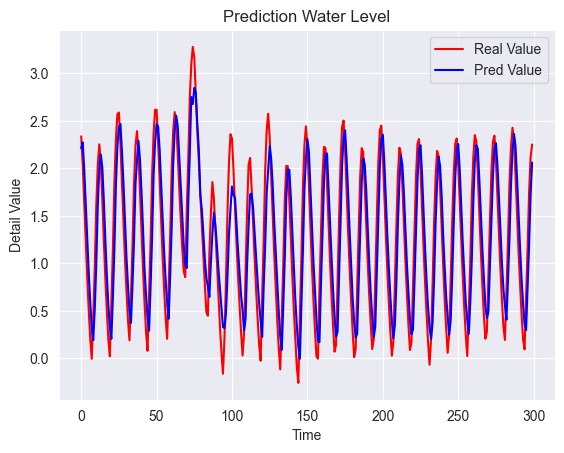

In [55]:
data_ana_pre(pre,5)

In [25]:
pre = np.array(pre).reshape(-1,1)

In [26]:
prediction_copies_array = np.repeat(pre,trainX.shape[1],axis = -1) #将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将

In [27]:
prediction_copies_array

array([[0.16217896, 0.16217896, 0.16217896, ..., 0.16217896, 0.16217896,
        0.16217896],
       [0.07512397, 0.07512397, 0.07512397, ..., 0.07512397, 0.07512397,
        0.07512397],
       [0.07729678, 0.07729678, 0.07729678, ..., 0.07729678, 0.07729678,
        0.07729678],
       ...,
       [0.36431449, 0.36431449, 0.36431449, ..., 0.36431449, 0.36431449,
        0.36431449],
       [0.24581352, 0.24581352, 0.24581352, ..., 0.24581352, 0.24581352,
        0.24581352],
       [0.15554254, 0.15554254, 0.15554254, ..., 0.15554254, 0.15554254,
        0.15554254]])

In [28]:
pre = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(pre),trainX.shape[1])))[:,0] #进行逆变换但是，只需要最后一列

In [29]:
pre

array([25.77979049, 17.49455762, 17.70134844, ..., 45.01751702,
       33.7394933 , 25.14818665])

In [30]:
# plot_importance(model)
# plt.show()
# print(pre[0:200])
# print(len(test))
# y_true = test[1:4784]

In [31]:
datasets = pd.read_csv('../Data/PreData/FLX_AU-ASM_FLUXNET2015_FULLSET_HH_2010-2014_2-4.csv')
y = datasets['SW_IN_F'][-2392:-2092]


In [32]:
y

28956    81.637931
28957    82.758621
28958    81.982759
28959    79.482759
28960    75.258621
           ...    
29251    45.603448
29252    34.655172
29253    23.793103
29254    12.844828
29255    17.068966
Name: SW_IN_F, Length: 300, dtype: float64

In [33]:
y_pred = pre[-2392:-2092]

In [34]:
y_pred

array([76.37812462, 78.65796874, 78.94752006, 77.67922819, 75.97267032,
       72.81769275, 65.85177508, 58.50622323, 49.30246861, 39.35584223,
       29.14210544, 18.95986456, 13.19387764, 24.50543086, 32.86880938,
       40.96093826, 48.77446702, 56.51974648, 64.3532431 , 70.24540091,
       73.40716115, 77.20794919, 78.7127359 , 79.38895543, 78.36609596,
       76.52778504, 72.12939315, 67.27978461, 58.37783209, 50.92593464,
       39.39625727, 30.13107912, 19.66263546, 12.98420097, 24.53113525,
       32.35539162, 40.4660679 , 48.49319578, 58.0077797 , 63.88655478,
       68.0110117 , 71.98317188, 75.58281485, 79.6282506 , 79.63117348,
       78.74570289, 75.05029717, 71.91448716, 66.88185732, 57.09233541,
       49.66468201, 39.172336  , 28.72978788, 19.24328616, 13.62799908,
       24.67269031, 31.24670697, 39.08239325, 47.53669294, 55.28803934,
       61.92385179, 68.80007526, 73.09491315, 76.60103168, 79.40480036,
       78.76959191, 78.47391053, 74.9288835 , 71.13803531, 64.93

In [35]:
import math
from sklearn.metrics import r2_score as r2, mean_squared_error

y=np.array(y)
MSE = mean_squared_error(y, y_pred)
RMSE = math.sqrt(MSE)
# MAE=mean_absolute_error(y, pre)
# MAPE = metrics.mean_absolute_percentage_error(y, pre)
MAE = np.mean(np.abs(y-y_pred))
MAPE = np.mean(np.abs((y - y_pred) / y))
print("rmse :",RMSE)
print("mae :", MAE)
print("mape :", MAPE)
print('R² :',r2(y,y_pred))

rmse : 5.708685923297881
mae : 4.660658143837191
mape : 0.11656976271387919
R² : 0.939388291157525


In [37]:
# y_true = pd.DataFrame(y)
# y_true.to_csv('../LSTM/LSTM_Result_Collection_SW_TA_LW_VPD_PA_WS_RH/PredictionResult/SW_TA_LW_VPD_PA_WS_RH/'+'SW_SVMYTrue'+'.csv',index=False)
# y_pre = pd.DataFrame(y_pred)
# y_pre.to_csv('../LSTM/LSTM_Result_Collection_SW_TA_LW_VPD_PA_WS_RH/PredictionResult/SW_TA_LW_VPD_PA_WS_RH/'+'SW_SVMYTPre'+'.csv',index=False)

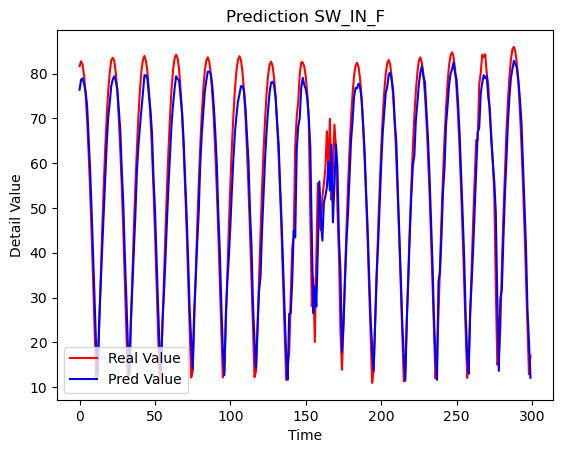

In [38]:
from matplotlib import pyplot as plt

plt.plot(y[0:300],color = 'red',label = 'Real Value')
plt.plot(pre[-2392:-2092],color = 'blue',label = 'Pred Value')
plt.title('Prediction SW_IN_F')
plt.xlabel('Time')
plt.ylabel('Detail Value')
plt.legend()
plt.show()